In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# set up lists to hold reponse info
lat = []
temp = []
city_name = []
country = []
humidity = []
cloudiness = []
windspeed = []


# Loop through the list of cities and perform a request for data on each
print("Data Retrieval")

row_count = 0

for city in cities:
    query_url = url  + city
    response = requests.get(query_url).json()
    if response["cod"] == "404":
        print("No city record found. Skipping....")
    
    else:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
    
    
    print("---------------------------------------------------")
    try:
        print("Proceesing: Record # " , row_count, ' | ' , response["name"], response['sys']['country'],'|' , response["id"])
        
    except KeyError: 
        print("Proceesing: Record # " , row_count, ' | ' , " City name not found on server")
        
        
    
    row_count += 1
    
print("---------------------------------------------------")    
print("Data Retrieval Complete")
print("---------------------------------------------------")
    

Data Retrieval
---------------------------------------------------
Proceesing: Record #  0  |  Lagoa PT | 2267254
---------------------------------------------------
Proceesing: Record #  1  |  Padang ID | 1633419
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  2  |   City name not found on server
---------------------------------------------------
Proceesing: Record #  3  |  Punta Arenas CL | 3874787
---------------------------------------------------
Proceesing: Record #  4  |  Atuona PF | 4020109
---------------------------------------------------
Proceesing: Record #  5  |  Cape Town ZA | 3369157
---------------------------------------------------
Proceesing: Record #  6  |  Busselton AU | 2075265
---------------------------------------------------
Proceesing: Record #  7  |  Hermanus ZA | 3366880
---------------------------------------------------
Proceesing: Record #  8  |  Faya SA | 110690
-----------------------------

---------------------------------------------------
Proceesing: Record #  78  |  Fairbanks US | 5861897
---------------------------------------------------
Proceesing: Record #  79  |  Batemans Bay AU | 2176639
---------------------------------------------------
Proceesing: Record #  80  |  Mount Gambier AU | 2156643
---------------------------------------------------
Proceesing: Record #  81  |  Sambava MG | 1056899
---------------------------------------------------
Proceesing: Record #  82  |  Jamestown AU | 2069194
---------------------------------------------------
Proceesing: Record #  83  |  La Brea TT | 3573739
---------------------------------------------------
Proceesing: Record #  84  |  Hithadhoo MV | 1282256
---------------------------------------------------
Proceesing: Record #  85  |  Muros ES | 3115824
---------------------------------------------------
Proceesing: Record #  86  |  Hluti SZ | 935076
---------------------------------------------------
Proceesing: Record

No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  154  |   City name not found on server
---------------------------------------------------
Proceesing: Record #  155  |  Sterling US | 4787534
---------------------------------------------------
Proceesing: Record #  156  |  Svetlogorsk RU | 584051
---------------------------------------------------
Proceesing: Record #  157  |  Zainsk RU | 465543
---------------------------------------------------
Proceesing: Record #  158  |  Sao Filipe CV | 3374210
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  159  |   City name not found on server
---------------------------------------------------
Proceesing: Record #  160  |  Kaitangata NZ | 2208248
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  161  |   City name not found on server
---------------------------------

---------------------------------------------------
Proceesing: Record #  230  |  Gat SN | 2249901
---------------------------------------------------
Proceesing: Record #  231  |  Jiuquan CN | 1280957
---------------------------------------------------
Proceesing: Record #  232  |  Luderitz NA | 3355672
---------------------------------------------------
Proceesing: Record #  233  |  Debre Tabor ET | 339686
---------------------------------------------------
Proceesing: Record #  234  |  Tura IN | 1254046
---------------------------------------------------
Proceesing: Record #  235  |  Siniscola IT | 3166509
---------------------------------------------------
Proceesing: Record #  236  |  Kavaratti IN | 1267390
---------------------------------------------------
Proceesing: Record #  237  |  Port Lincoln AU | 2063036
---------------------------------------------------
Proceesing: Record #  238  |  Bathsheba BB | 3374083
---------------------------------------------------
Proceesing: R

---------------------------------------------------
Proceesing: Record #  306  |  Khor RU | 2022317
---------------------------------------------------
Proceesing: Record #  307  |  San Patricio PY | 3437029
---------------------------------------------------
Proceesing: Record #  308  |  Oelde DE | 2857943
---------------------------------------------------
Proceesing: Record #  309  |  Takoradi GH | 2294915
---------------------------------------------------
Proceesing: Record #  310  |  Alice Springs AU | 2077895
---------------------------------------------------
Proceesing: Record #  311  |  Hegang CN | 2036986
---------------------------------------------------
Proceesing: Record #  312  |  Kambove CD | 923058
---------------------------------------------------
Proceesing: Record #  313  |  Alihe CN | 2038665
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  314  |   City name not found on server
-------------------------

---------------------------------------------------
Proceesing: Record #  382  |  Cacapava do Sul BR | 3468560
---------------------------------------------------
Proceesing: Record #  383  |  Verkhoyansk RU | 2013465
---------------------------------------------------
Proceesing: Record #  384  |  Husavik CA | 5961417
---------------------------------------------------
Proceesing: Record #  385  |  Narsaq GL | 3421719
---------------------------------------------------
Proceesing: Record #  386  |  Tarko-Sale RU | 1490085
---------------------------------------------------
Proceesing: Record #  387  |  Ganzhou CN | 1810638
---------------------------------------------------
Proceesing: Record #  388  |  Pingliang CN | 1798760
---------------------------------------------------
Proceesing: Record #  389  |  Pacific Grove US | 5380437
---------------------------------------------------
Proceesing: Record #  390  |  San Luis AR | 3837056
--------------------------------------------------

No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  459  |   City name not found on server
---------------------------------------------------
Proceesing: Record #  460  |  Bila Tserkva UA | 712165
---------------------------------------------------
Proceesing: Record #  461  |  Coquimbo CL | 3893629
---------------------------------------------------
Proceesing: Record #  462  |  Nhulunbuy AU | 2064735
---------------------------------------------------
Proceesing: Record #  463  |  Decatur US | 4617650
---------------------------------------------------
Proceesing: Record #  464  |  Pangoa PE | 3933104
---------------------------------------------------
Proceesing: Record #  465  |  Pundaguitan PH | 1698289
---------------------------------------------------
Proceesing: Record #  466  |  Minab IR | 123941
---------------------------------------------------
Proceesing: Record #  467  |  Tessalit ML | 2449893
--------------------

---------------------------------------------------
Proceesing: Record #  536  |  Vardo US | 4372777
---------------------------------------------------
Proceesing: Record #  537  |  Puebloviejo CO | 3671615
---------------------------------------------------
Proceesing: Record #  538  |  Bida NG | 2347209
---------------------------------------------------
Proceesing: Record #  539  |  Green River US | 5826559
---------------------------------------------------
Proceesing: Record #  540  |  Pasewalk DE | 2855337
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  541  |   City name not found on server
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  542  |   City name not found on server
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  543  |   City name not found on server
-------------------------------------

In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Temperature (F)": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "WindSpeed": windspeed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               544
Country            544
Latitude           544
Temperature (F)    544
Humidity           544
Cloudiness         544
WindSpeed          544
dtype: int64

In [5]:
weather_data.head()

,City,Country,Latitude,Temperature (F),Humidity,Cloudiness,WindSpeed
0,Lagoa,PT,37.14,75.20,60,0,11.41
1,Padang,ID,-0.92,81.56,100,12,2.37
2,Punta Arenas,CL,-53.16,42.80,75,40,13.87
3,Atuona,PF,-9.80,79.04,100,0,14.90
4,Cape Town,ZA,-33.93,57.20,76,20,11.41


In [6]:
# Save data to a CSV file
weather_data.to_csv("WeatherPy_analysis/City_Data.csv")

In [7]:
#Set up variables for current date
now = time.localtime(time.time())
date = time.strftime("%m/%d/%y", now)

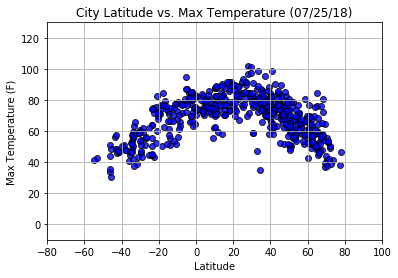

In [8]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(weather_data["Latitude"], 
            weather_data["Temperature (F)"], c="blue",
            edgecolor="black", linewidths=1, marker="o",
             alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")      
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 130])


# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Temperature.png")

# Show plot
plt.show()


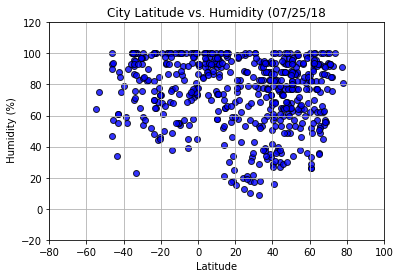

In [9]:
#Build a scatter plot for Latitude vs. Humidity

plt.scatter(weather_data["Latitude"], 
            weather_data["Humidity"], c="blue",
            edgecolor="black", linewidths=1, marker="o",
             alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date}")      
plt.ylabel(" Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])


# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Humidity.png")

# Show plot
plt.show()

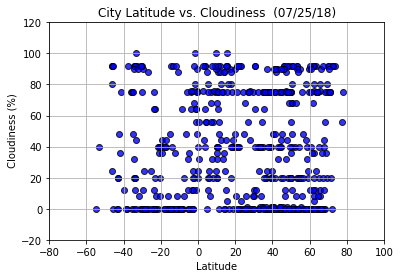

In [10]:
#Build a scatter plot for Latitude vs. Cloudiness

plt.scatter(weather_data["Latitude"], 
            weather_data["Cloudiness"], c="blue",
            edgecolor="black", linewidths=1, marker="o",
             alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness  ({date})")      
plt.ylabel(" Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])


# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

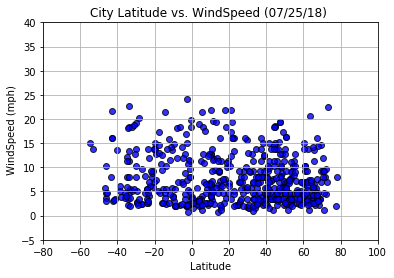

In [11]:
#Build a scatter plot for Latitude vs. Windspeed

plt.scatter(weather_data["Latitude"], 
            weather_data["WindSpeed"], c="blue",
            edgecolor="black", linewidths=1, marker="o",
             alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. WindSpeed ({date}) ")      
plt.ylabel(" WindSpeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 40])


# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Windspeed.png")

# Show plot
plt.show()


# WeatherPy - Analysis:


1. Even though the dataset is based on a random and uniform distribution of generated coordinates, most of the cities from the data retrieval process lie in the northern hemishphere. This however correlates with the fact that 90% of the world population live in cities in the northern hemisphere.


2. The highest temperatures lie between latitudes -20 and 40 degrees. This confirms the fact that the closer you move to the Equator, which lies on latitude 0 degrees, the warmer it gets. Based on the data, the highest temperatures are in the northern hemishpere which currently is experiencing  its summer season. In stark contrast, the southern hemisphere is just beginning its winter season and temperatures will continue to dip as the months move along. As is the case, the plotted data shows that the lowest temperature among the generated records is in the southern hemisphere.


3. Humidity is a concentration of water vapor in the air. From the plotted data, there is almost no difference in humidity levels across the two hemispheres. Rather, most cities in the generated dataset are all currently experiencing 60% and above humidity levels. This signifies a lot of water vapor in the atmosphere which should result in increased precipation as is the case now across many places in Africa, Asia and North America.
